In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
df_m = pd.read_html('https://web.archive.org/web/20160405190424/http://www.isuresults.com/ws/ws/wsmen.htm', header =None)[3]

In [3]:
df_w = pd.read_html('https://web.archive.org/web/20160405190424/http://www.isuresults.com/ws/ws/wsladies.htm', header =None)[3]

In [4]:
df_p = pd.read_html('https://web.archive.org/web/20160405190424/http://www.isuresults.com/ws/ws/wspairs.htm', header =None)[3]

In [5]:
df_m1 = df_m.loc[4:99,[0,1,4]].rename(columns = ({0:'rank',1:'score',4:'olmp'})).reset_index()
df_w1 = df_w.loc[4:99,[0,1,4]].rename(columns = ({0:'rank',1:'score',4:'olmp'})).reset_index()
df_p1 = df_p.loc[4:99,[0,1,4]].rename(columns = ({0:'rank',1:'score',4:'olmp'})).reset_index()

In [6]:
df_m2 = pd.concat([df_m1, pd.DataFrame(df_m1['olmp'].str.split('  ')\
                              .tolist(), columns=['y1','y2','y3'])\
                               .astype(int)\
                               .sum(axis =1)], axis =1)

df_w2 = pd.concat([df_w1, pd.DataFrame(df_w1['olmp'].str.split('  ')\
                              .tolist(), columns=['y1','y2','y3'])\
                               .astype(int)\
                               .sum(axis =1)], axis =1)

df_p2 = pd.concat([df_p1, pd.DataFrame(df_p1['olmp'].str.split('  ')\
                              .tolist(), columns=['y1','y2','y3'])\
                               .astype(int)\
                               .sum(axis =1)], axis =1)

In [7]:
df_m2 = df_m2.drop(['index','olmp'], axis =1)
df_w2 = df_w2.drop(['index','olmp'], axis =1)
df_p2 = df_p2.drop(['index','olmp'], axis =1)

In [8]:
df_m2.rename(columns=({0:'olmp'}), inplace=True)
df_w2.rename(columns=({0:'olmp'}), inplace=True)
df_p2.rename(columns=({0:'olmp'}), inplace=True)

In [9]:
df_m2 = df_m2.astype(int)
df_w2 = df_w2.astype(int)
df_p2 = df_p2.astype(int)

In [13]:
df_w2['sex'] ='Ladies'
df_m2['sex'] ='Men'
df_p2['sex'] ='Pairs'

In [14]:
df3 = pd.concat([df_m2,df_w2,df_p2])

In [34]:
df3['olm_sc'] = df3.olmp/df3.score

<IPython.core.display.Javascript object>


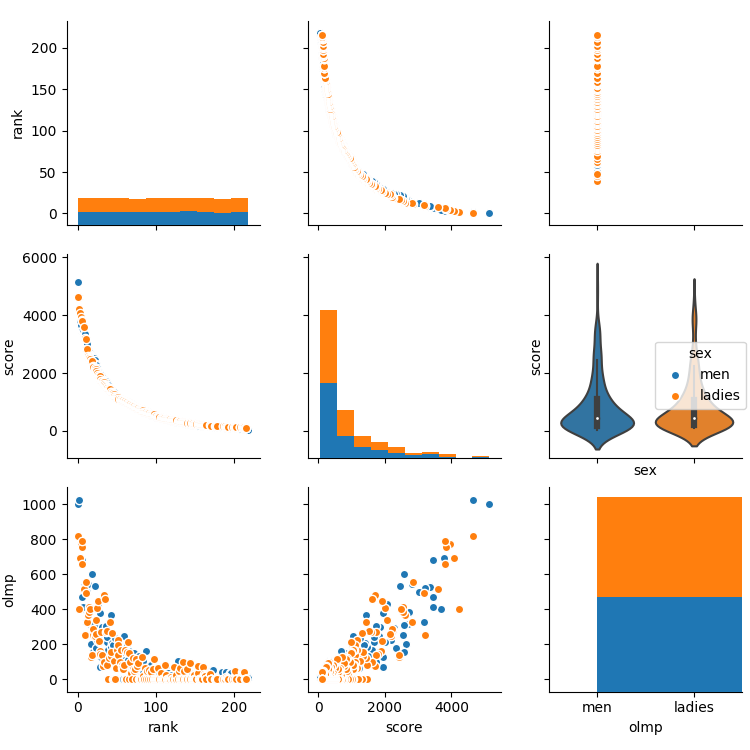

In [24]:
sb.pairplot(df3, hue='sex')

<IPython.core.display.Javascript object>


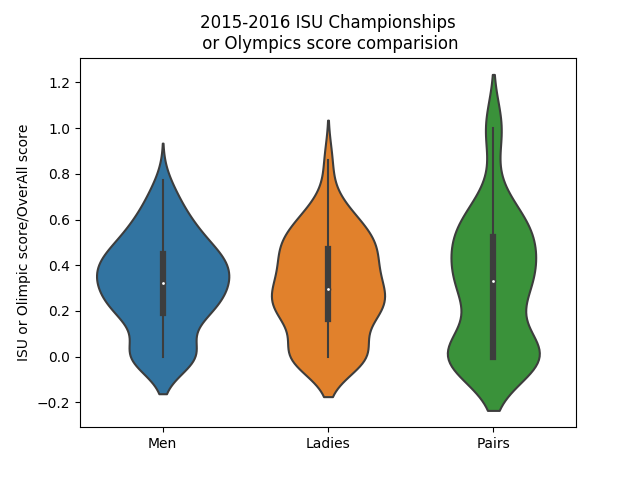

In [35]:
sb.violinplot('sex', 'olm_sc', data = df3)

In [38]:
plt.gca().set_title('2015-2016 ISU Championships\n or Olympics score comparision')

Text(0.5,1,'2015-2016 ISU Championships\n or Olympics score comparision')

In [44]:
plt.gca().set_ylabel('ISU or Olimpic score/OverAll score')

Text(31.2222,0.5,'ISU or Olimpic score/OverAll score')

In [41]:
plt.gca().set_xlabel('')

Text(0.5,23.5222,'')

In [37]:
df3[df3.olm_sc>0.9]

,rank,score,olmp,sex,olm_sc
69,70,328,328,Pairs,1.0
72,71,312,312,Pairs,1.0
78,79,214,214,Pairs,1.0
86,87,141,141,Pairs,1.0
88,89,127,127,Pairs,1.0
95,96,65,65,Pairs,1.0
